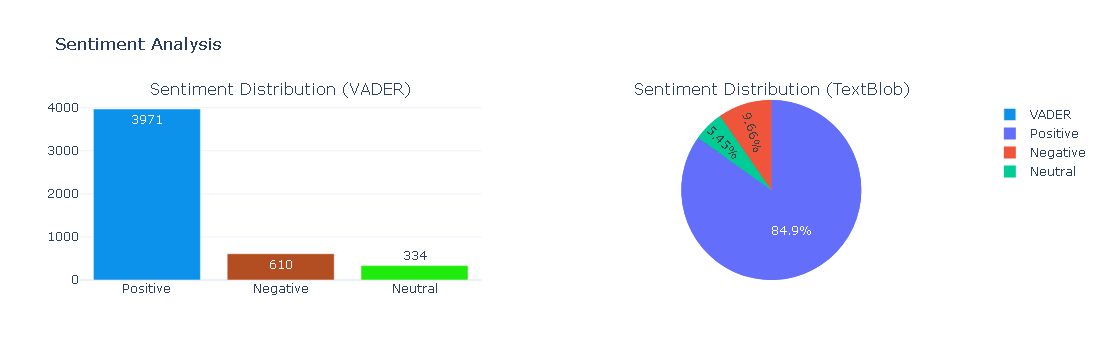

In [1]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
cf.go_offline()


df = pd.read_csv('amazon.csv')

df['reviewText'] = df['reviewText'].apply(lambda x: re.sub("[^a-zA-Z]", ' ', str(x)))  
df['reviewText'] = df['reviewText'].str.lower() 


def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df['sentiment_vader'] = df['reviewText'].apply(analyze_sentiment_vader)

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_textblob'] = df['reviewText'].apply(analyze_sentiment_textblob)

def plot_sentiment_analysis(df):
    # Initialize subplots
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Sentiment Distribution (VADER)', 'Sentiment Distribution (TextBlob)'),
                        specs=[[{"type": "xy"}, {"type": "domain"}]])

    # Bar Chart (VADER)
    fig.add_trace(go.Bar(x=df['sentiment_vader'].value_counts().index,
                         y=df['sentiment_vader'].value_counts().values,
                         marker_color=['#0C92EB', '#B34D22', '#1FEB0C'],
                         text=df['sentiment_vader'].value_counts().values,
                         textposition='auto',
                         name='VADER'),
                  row=1, col=1)

    # Pie Chart (VADER)
    fig.add_trace(go.Pie(labels=df['sentiment_vader'].value_counts().index,
                         values=df['sentiment_vader'].value_counts().values,
                         name='VADER'),
                  row=1, col=2)

    # Pie Chart (TextBlob)
    fig.add_trace(go.Pie(labels=df['sentiment_textblob'].value_counts().index,
                         values=df['sentiment_textblob'].value_counts().values,
                         name='TextBlob'),
                  row=1, col=2)

    # Update layout
    fig.update_layout(title_text='Sentiment Analysis',
                      template='plotly_white')

    # Display the plot
    iplot(fig)

# Plot sentiment analysis
plot_sentiment_analysis(df)
